In [1]:
%matplotlib inline
import firedrake
from firedrake import sqrt, exp, tanh
import hillslope

In [2]:
k = 0.0035  # m^2/year
γ = 1.25    # dimensionless
U = 7.5e-4  # m/year

In [3]:
L, W = 200, 200
N = 48
mesh = firedrake.RectangleMesh(N, N, L, W)

degree = 2
Q = firedrake.FunctionSpace(mesh, "Lagrange", degree)

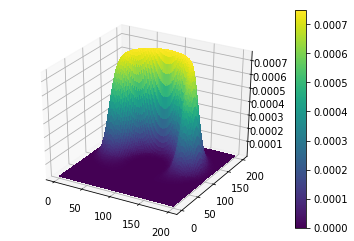

In [4]:
x, y = mesh.coordinates
R = 16
r = sqrt((x - L/2)**2 + (y - W/2)**2)
expression = exp(-(r/R - 4)**2) * (1 + tanh((y - W/2)/R))/2
u = firedrake.interpolate(U * expression, Q)
firedrake.plot(u, cmap='viridis', plot3d=True)

7: 49.42476886000096, -3.2439487157968833e-06


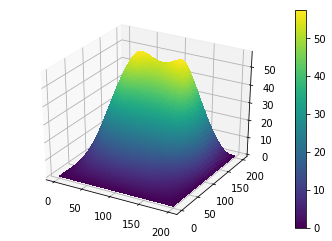

In [5]:
z = hillslope.steady_state(u)
firedrake.plot(z, cmap='viridis', plot3d=True)